In [1]:
#test to add standard scaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# %matplotlib inline
red_wine = pd.read_csv('winequality-red.csv', delimiter=';')


In [3]:
red_wine
red_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
grade = [] #add column grade to classify the quality of the wine
for i in red_wine['quality']: 
    if i >= 7:
        i = 1
        grade.append(i)
    else:
        i = 0
        grade.append(i)
red_wine['grade'] = grade

In [5]:
# red_wine.drop('class', axis=1, inplace=True)
# red_wine.drop('quality', axis = 1, inplace = True)

In [6]:
# convert 'Class' feature into numeric
# wine_data.head(10)

In [7]:
# plt.figure(figsize=(15,10))
# sns.heatmap(wine_data.corr(), annot=True, vmin=-1, vmax=1, cmap='PiYG')
# plt.show()

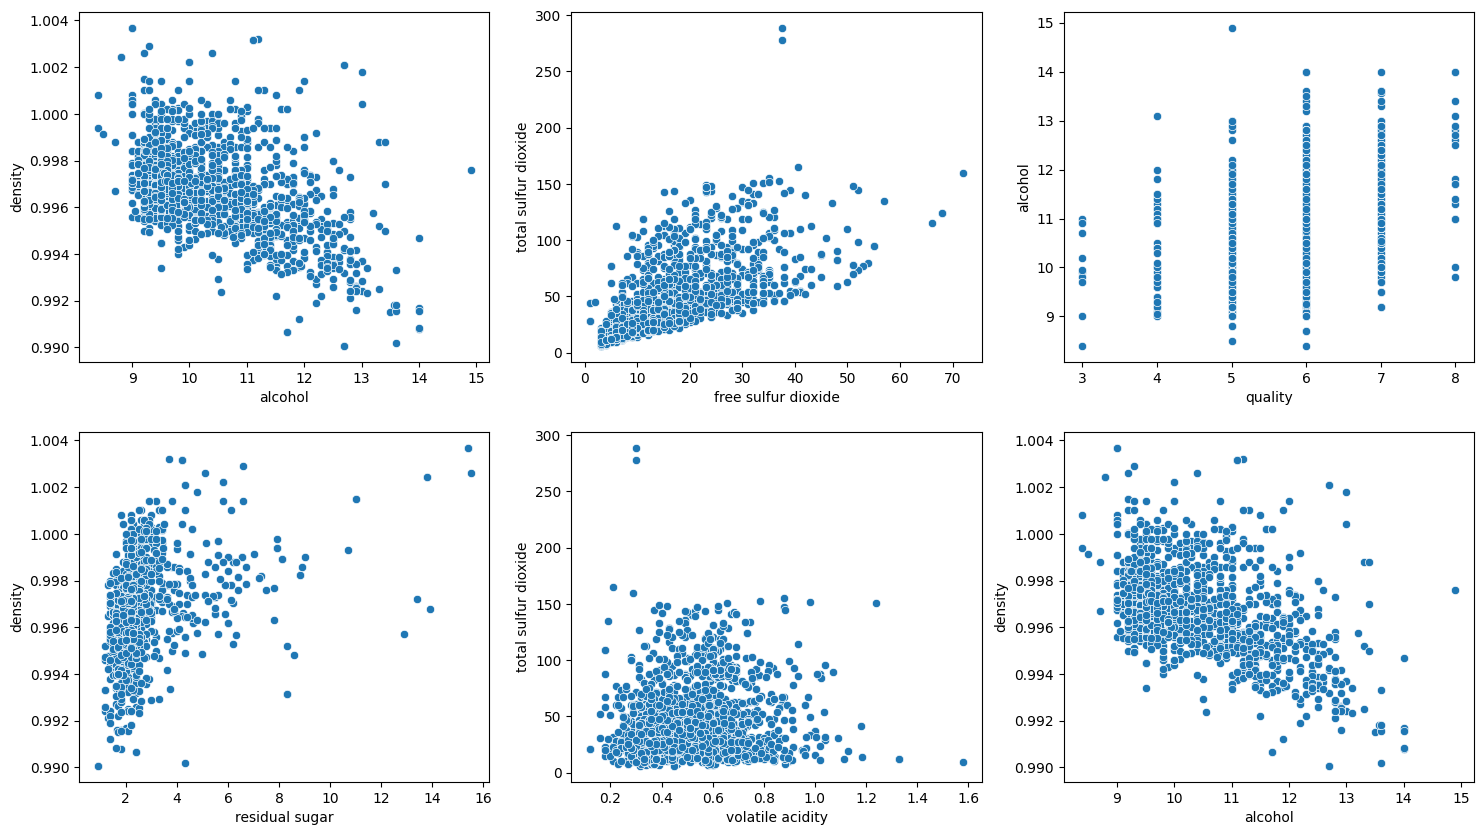

In [28]:
fig, axes = plt.subplots(2,3, figsize=(18,10))
sns.scatterplot(data=red_wine, x='alcohol', y='density', ax=axes[0, 0])
sns.scatterplot(data=red_wine, x='free sulfur dioxide', y='total sulfur dioxide', ax=axes[0, 1])
sns.scatterplot(data=red_wine, x='quality', y='alcohol', ax=axes[0, 2])
sns.scatterplot(data=red_wine, x='residual sugar', y='density', ax=axes[1, 0])
sns.scatterplot(data=red_wine, x='volatile acidity', y='total sulfur dioxide', ax=axes[1, 1])
sns.scatterplot(data=red_wine, x='alcohol', y='density', ax=axes[1, 2])
plt.show()

In [9]:
#convert data type to numeric
red_wine = red_wine.astype('float64')
red_wine['grade'] = red_wine['grade'].astype('int64')
data_X = red_wine.drop('grade', axis=1)
data_y = red_wine['grade']

In [10]:
# wine_data.describe()

In [11]:
def train_test_split(X,y,test_size):
    test_size = 0.2
    train_size = 1 - float(test_size)
    total_rows = red_wine.shape[0]
    split =  int(total_rows * (train_size))
    X_train = data_X[0:split]
    X_test = data_X[split:]
    y_train = data_y[0:split]
    y_test = data_y[split:]
    return X_train, X_test, y_train, y_test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2)

In [13]:
y_train[y_train == 0] = -1
y_test[y_test == 0] = -1

In [14]:
print("X train:",len(X_train))
print("X test:",len(X_test))
print("y train:",len(y_train))
print("y test:",len(y_test))

X train: 1279
X test: 320
y train: 1279
y test: 320


In [15]:
# implement Support Vector Machines
import numpy as np

class SVM:
    def __init__(self, learning_rate=10000, lambda_param=0.00001, num_iterations=100):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.weights) - self.bias) >= 1
                if condition:
                    self.weights -= self.learning_rate * (2 * self.lambda_param * self.weights)
                else:
                    self.weights -= self.learning_rate * (2 * self.lambda_param * self.weights - np.dot(x_i, y[idx]))
                    self.bias -= self.learning_rate * y[idx]

    def predict(self, X):
        approx = np.dot(X, self.weights) - self.bias
        return np.sign(approx)


In [16]:
svm_model = SVM()
svm_model.fit(X_train.to_numpy(), y_train.to_numpy())

In [17]:
# Evaluate accuracy
svm_y_pred = svm_model.predict(X_test.to_numpy())
accuracy = np.mean(svm_y_pred == y_test)
print('Accuracy Score:', float(accuracy*100),"%")

Accuracy Score: 92.1875 %


In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(svm_y_pred, y_test)
cm_wine_data = pd.DataFrame(cm)
cm_wine_data.columns = ['Predict -1','Predict 1']
cm_wine_data = cm_wine_data.rename(index={0: 'Actual -1',1:'Actual 1'})
cm_wine_data

,Predict -1,Predict 1
Actual -1,295,25
Actual 1,0,0


In [19]:
# Future Predictions
new_redwine = red_wine.sample(5)
new_redwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,grade
1307,6.8,0.68,0.09,3.9,0.068,15.0,29.0,0.99524,3.41,0.52,11.1,4.0,-1
551,9.4,0.43,0.24,2.8,0.092,14.0,45.0,0.99800,3.19,0.73,10.0,6.0,-1
646,7.3,0.67,0.05,3.6,0.107,6.0,20.0,0.99720,3.40,0.63,10.1,5.0,-1
792,7.1,0.61,0.02,2.5,0.081,17.0,87.0,0.99745,3.48,0.60,9.7,6.0,-1
760,9.0,0.58,0.25,2.8,0.075,9.0,104.0,0.99779,3.23,0.57,9.7,5.0,-1


In [20]:
new_X = new_redwine.drop('grade', axis=1)

In [21]:
# scaler = StandardScaler()
# new_X = scaler.fit_transform(new_X)

In [22]:
new_X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1307,6.8,0.68,0.09,3.9,0.068,15.0,29.0,0.99524,3.41,0.52,11.1,4.0
551,9.4,0.43,0.24,2.8,0.092,14.0,45.0,0.99800,3.19,0.73,10.0,6.0
646,7.3,0.67,0.05,3.6,0.107,6.0,20.0,0.99720,3.40,0.63,10.1,5.0
792,7.1,0.61,0.02,2.5,0.081,17.0,87.0,0.99745,3.48,0.60,9.7,6.0
760,9.0,0.58,0.25,2.8,0.075,9.0,104.0,0.99779,3.23,0.57,9.7,5.0


In [23]:
svm_y_pred_new = svm_model.predict(new_X)

svm_y_pred_new

array([-1., -1., -1., -1., -1.])